In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [3]:
!pip install --upgrade matplotlib statsmodels

Defaulting to user installation because normal site-packages is not writeable


# Siedlungsabfälle nach Abfallbewirtschaftungsmaßnahmen (env_wasmun)

[Data Explorere](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=env_wasmun&lang=de)

[Abfallwirtschaft in der EU: Zahlen und Fakten](https://www.europarl.europa.eu/news/de/headlines/society/20180328STO00751/abfallwirtschaft-in-der-eu-zahlen-und-fakten)

[Municipal waste statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Municipal_waste_statistics#Municipal_waste_generation)


## Read in data

In [3]:
file_generation = "data/env_wasgen.xls"
file_waste_municipal = "data/env_wasmun.xls"

In [4]:
print_codes(file_generation)

Category:  UNIT
---------
T: Tonne
KG_HAB: Kilograms per capita

Category:  HAZARD
---------
HAZ: Hazardous
HAZ_NHAZ: Hazardous and non-hazardous - Total
NHAZ: Non-hazardous

Category:  WASTE
---------
W06_07A: Recyclable wastes (subtotal, W06+W07 except W077)
SEC: Secondary waste (W033+W103+W128_13)
TOTAL: Total waste
PRIM: Primary waste (TOTAL minus SEC)
W09: Animal and vegetal wastes (subtotal, W091+W092+W093)
W11: Common sludges
W01-05: Chemical and medical wastes (subtotal)
W10: Mixed ordinary wastes (subtotal, W101+W102+W103)
W077_08: Equipment (subtotal, W077+W08A+W081+W0841)
TOT_X_MIN: Waste excluding major mineral wastes
W12-13: Mineral and solidified wastes (subtotal)

Category:  NACE_R2
---------
G4677: Wholesale of waste and scrap
TOTAL_HH: All NACE activities plus households
B: Mining and quarrying
D: Electricity, gas, steam and air conditioning supply
E: Water supply; sewerage, waste management and remediation activities
C: Manufacturing
EP_HH: Households
G-U_X_G4677: Ser

In [5]:
print_codes(file_waste_municipal)

Category:  WST_OPER
---------
DSP_I: Beseitigung - Verbrennung (D10)
GEN: Erzeugter Abfall
RCV_E: Verwertung - energetische Verwertung (R1)
TRT: Abfallbehandlung
DSP_I_RCV_E: Beseitigung - Verbrennung (D10) und Verwertung - energetische Verwertung (R1)
RCY_M: Recycling - werkstofflich
DSP_L_OTH: Beseitigung - Deponien und sonstiges (D1-D7, D12)
RCY_C_D: Recycling - Kompostierung und Vergärung

Category:  UNIT
---------
T: Tonne
THS_T: Tausend Tonnen
KG_HAB: Kilogramm pro Kopf



In [6]:
df = get_data_from_excel(file_waste_municipal)

In [7]:
df

,year,value,wst_oper,unit
geo,,,,
EU27_2020,1995,467.0,GEN,KG_HAB
EU28,1995,470.0,GEN,KG_HAB
BE,1995,455.0,GEN,KG_HAB
BG,1995,694.0,GEN,KG_HAB
CZ,1995,302.0,GEN,KG_HAB
...,...,...,...,...
AL,2019,NaN,RCY_C_D,THS_T
RS,2019,NaN,RCY_C_D,THS_T
TR,2019,125.0,RCY_C_D,THS_T


In [8]:
df.to_parquet("data/env_wasmun_combined.parquet")

In [6]:
df_waste_generation = pd.read_parquet("data/env_wasgen_combined.parquet")
df_waste_municipal = pd.read_parquet("data/env_wasmun_combined.parquet")

In [7]:
df_waste_generation

,year,value,unit,hazard,waste,nace_r2
geo,,,,,,
EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...
AL,2018,NaN,T,NHAZ,TOT_X_MIN,TOTAL_HH
RS,2018,11780914.0,T,NHAZ,TOT_X_MIN,TOTAL_HH
TR,2018,74786520.0,T,NHAZ,TOT_X_MIN,TOTAL_HH


In [6]:
df_waste_municipal

,year,value,wst_oper,unit
geo,,,,
EU27_2020,1995,467.0,GEN,KG_HAB
EU28,1995,470.0,GEN,KG_HAB
BE,1995,455.0,GEN,KG_HAB
BG,1995,694.0,GEN,KG_HAB
CZ,1995,302.0,GEN,KG_HAB
...,...,...,...,...
AL,2019,NaN,RCY_C_D,THS_T
RS,2019,NaN,RCY_C_D,THS_T
TR,2019,125.0,RCY_C_D,THS_T


In [8]:
df_waste_municipal.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [9]:
df_waste_municipal.describe(include=["category"])

,wst_oper,unit
count,24000,24000
unique,8,3
top,DSP_I,KG_HAB
freq,3000,8000


## Waste treatment 2017

codes:
- GEN: Erzeugter Abfall
- RCY_C_D: Recycling - Kompostierung und Vergärung
- RCY_M: Recycling - werkstofflich
- DSP_L_OTH: Beseitigung - Deponien und sonstiges (D1-D7, D12)

### Question 1: Anteil Siedlungsabfälle am Gesamtabfallaufkommen
Siedlungsabfälle machen weniger als ein Zehntel des Gesamtabfallaufkommens von 2,5 Milliarden Tonnen aus, das pro Jahr in der EU anfällt.

In [8]:
waste_total = df_waste_generation.query("year == 2018 and unit == 'T' and hazard == 'HAZ_NHAZ' and waste == 'TOTAL' and nace_r2 == 'TOTAL_HH'").loc["EU28"].value

f"{waste_total:,}"

'2,618,970,000.0'

In [9]:
waste_municipal = df_waste_municipal.query("year == 2018 and wst_oper =='GEN' and unit == 'THS_T'").loc["EU28"].value * 1000

f"{waste_municipal:,}"

'252,396,000.0'

In [11]:
f"Siedlungsabfall macht im Jahr 2018 insgesamt {round(waste_municipal / waste_total * 100)} Prozent des gesamten Abfallaufkommens in der EU aus"

'Siedlungsabfall macht im Jahr 2018 insgesamt 10 Prozent des gesamten Abfallaufkommens in der EU aus'

### Question 2: Welche Trends sind für den Siedlungsabfall zu beobachten?
2018 wurden neue, ehrgeizige EU-Ziele verabschiedet, um Wiederverwendung und Recycling zu fördern, Verpackungsabfälle zu verringern und die Deponieablagerung in der Union einzuschränken. Die Vorgaben sollen zur Schaffung einer nachhaltigen Kreislaufwirtschaft in der EU beitragen.

Im Zeitraum von 2005 bis 2018 ging die durchschnittlich von einer Person in der EU produzierte Menge an Siedlungsabfällen zurück. Dennoch sind für die einzelnen EU-Mitgliedsländer unterschiedliche Trends erkennbar: So gibt es in Dänemark, Deutschland, Griechenland, Malta und Tschechien Zuwächse. Geringere Abfallmengen verzeichnen Bulgarien, Spanien, Ungarn, Rumänien und die Niederlande.

![](https://www.umweltwirtschaft.com/news/media/8/EU-FB-MUNICIPAL-WASTE-01.jpg-74840-detailpp.jpeg)

In [12]:
waste_gen_for_eu28_over_time = df_waste_municipal.query("wst_oper == 'GEN' and unit == 'KG_HAB'").loc["EU28"]

In [14]:
px.bar(
    waste_gen_for_eu28_over_time,
    x = "year",
    y="value",
    title="Municipal waste generation for EU28 from 1995 to 2018", labels={"value": "Kilograms per person"},
    text="value"
)

# zoom in for 2005 - noww

In [19]:
waste_gen_for_2018 = df_waste_municipal.query("year == 2018 and wst_oper == 'GEN' and unit == 'KG_HAB' and geo != 'EU27_2020'").reset_index()
eu28_value = waste_gen_for_2018.query("geo == 'EU28'").value.values[0]
waste_gen_for_2018 = waste_gen_for_2018.assign(below_average=waste_gen_for_2018.value <= eu28_value)

In [20]:
fig = px.bar(
    waste_gen_for_2018,
    x="geo",
    y="value",
    title="Municipal waste generation for EU28 in 2018",
    labels={"value": "Kilogram per person", "below_average": "Below EU28 average"},
    color=waste_gen_for_2018.below_average,
    color_discrete_map={True: "green", False: "red"}
)

fig.add_hline(y=eu28_value, line_width=2, line_color="green")

fig

### Question 3: Erreichen wir die EU Ziele für 2025?
![](https://www.europarl.europa.eu/resources/library/images/20201201PHT92822/20201201PHT92822_original.jpg)

In [21]:
# store each operation in its own df
df_household_generation = df_waste_municipal.query("year == 2017 and unit == 'KG_HAB' and wst_oper == 'GEN'")
df_household_recycling_compost = df_waste_municipal.query("year == 2017 and unit == 'KG_HAB' and wst_oper == 'RCY_C_D'")
df_household_recycling_material = df_waste_municipal.query("year == 2017 and unit == 'KG_HAB' and wst_oper == 'RCY_M'")
df_household_landfill = df_waste_municipal.query("year == 2017 and unit == 'KG_HAB' and wst_oper == 'DSP_L_OTH'")

In [22]:
df_household_generation

,year,value,wst_oper,unit
geo,,,,
EU27_2020,2017,496.0,GEN,KG_HAB
EU28,2017,492.0,GEN,KG_HAB
BE,2017,411.0,GEN,KG_HAB
BG,2017,435.0,GEN,KG_HAB
CZ,2017,489.0,GEN,KG_HAB
DK,2017,820.0,GEN,KG_HAB
DE,2017,627.0,GEN,KG_HAB
EE,2017,390.0,GEN,KG_HAB
IE,2017,576.0,GEN,KG_HAB


In [23]:
df_household_recycling_compost

,year,value,wst_oper,unit
geo,,,,
EU27_2020,2017,85.0,RCY_C_D,KG_HAB
EU28,2017,84.0,RCY_C_D,KG_HAB
BE,2017,81.0,RCY_C_D,KG_HAB
BG,2017,34.0,RCY_C_D,KG_HAB
CZ,2017,50.0,RCY_C_D,KG_HAB
DK,2017,154.0,RCY_C_D,KG_HAB
DE,2017,114.0,RCY_C_D,KG_HAB
EE,2017,14.0,RCY_C_D,KG_HAB
IE,2017,51.0,RCY_C_D,KG_HAB


In [24]:
df_stats = pd.DataFrame(
    {
        "year": 2017,
        "GEN": df_household_generation.value,
        "RCY": df_household_recycling_compost.value + df_household_recycling_material.value,
        "DSP_L": df_household_landfill.value
    },
    index=df_household_generation.index
)
df_stats

,year,GEN,RCY,DSP_L
geo,,,,
EU27_2020,2017,496.0,233.0,120.0
EU28,2017,492.0,229.0,115.0
BE,2017,411.0,221.0,4.0
BG,2017,435.0,151.0,269.0
CZ,2017,489.0,157.0,222.0
DK,2017,820.0,390.0,8.0
DE,2017,627.0,421.0,5.0
EE,2017,390.0,110.0,75.0
IE,2017,576.0,232.0,130.0


In [21]:
# alternatively, get df_stats directly by query...but this long format is not very good for adding new features
# it would be possible but you have to think about it...a new feature aka column would be needed to be appended at the end
# so adding a new feature requires to create a dataframe first and append it to df_stats
df_stats = df_waste_municipal.query("year == 2017 and unit == 'KG_HAB' and wst_oper in ['GEN', 'RCY_C_D', 'RCY_M', 'DSP_L']")
df_stats

,year,value,wst_oper,unit
geo,,,,
EU27_2020,2017,496.0,GEN,KG_HAB
EU28,2017,492.0,GEN,KG_HAB
BE,2017,411.0,GEN,KG_HAB
BG,2017,435.0,GEN,KG_HAB
CZ,2017,489.0,GEN,KG_HAB
...,...,...,...,...
AL,2017,NaN,RCY_C_D,KG_HAB
RS,2017,0.0,RCY_C_D,KG_HAB
TR,2017,2.0,RCY_C_D,KG_HAB


In [25]:
df_stats = df_stats.assign(recycling_rate=df_stats.RCY / df_stats.GEN, disposal_rate=df_stats.DSP_L / df_stats.GEN)
df_stats.reset_index(inplace=True)

In [26]:
df_stats

,geo,year,GEN,RCY,DSP_L,recycling_rate,disposal_rate
0,EU27_2020,2017,496.0,233.0,120.0,0.469758,0.241935
1,EU28,2017,492.0,229.0,115.0,0.465447,0.233740
2,BE,2017,411.0,221.0,4.0,0.537713,0.009732
3,BG,2017,435.0,151.0,269.0,0.347126,0.618391
4,CZ,2017,489.0,157.0,222.0,0.321063,0.453988
5,DK,2017,820.0,390.0,8.0,0.475610,0.009756
6,DE,2017,627.0,421.0,5.0,0.671451,0.007974
7,EE,2017,390.0,110.0,75.0,0.282051,0.192308
8,IE,2017,576.0,232.0,130.0,0.402778,0.225694
9,EL,2017,504.0,95.0,403.0,0.188492,0.799603


In [27]:
df_stats.query("geo == 'DE'")

,geo,year,GEN,RCY,DSP_L,recycling_rate,disposal_rate
6,DE,2017,627.0,421.0,5.0,0.671451,0.007974


In [12]:
?px.bar

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a bar plot, each row of `data_frame` is represented as a rectangular
    mark.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
   

In [31]:
px.bar(
    df_stats,
    x="geo",
    y=["GEN", "RCY", "DSP_L"],
    barmode="group",
    color_discrete_map={"GEN": "blue", "RCY": "green", "DSP_L": "red"},
    title="Municipal waste generation vs recycling vs landfill for EU in 2017",
    opacity=0.6
)

In [0]:
# task: find all countries with a recycling rate worse than the EU average (or landfill rate)

In [36]:
fig = px.bar(
    df_stats,
    x="geo",
    y=["recycling_rate", "disposal_rate"],
    barmode="group",
    title="Siedlungsabfälle: EU-Ziele 2025 Stand 2017",
    labels={"geo": "Countries", "value": "Kilograms per capita"},
    color_discrete_map={"recycling_rate": "green", "disposal_rate": "red"},
    opacity=0.6
)
fig.add_hline(y=0.55, line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=0.10,  line_width=3, line_dash="dash", line_color="red")

fig.show()

## Question 4: Prognose für die EU

In [37]:
# store each operation in its own df
df_household_generation = df_waste_municipal.query("geo == 'EU28' and unit == 'KG_HAB' and wst_oper == 'GEN'")
df_household_recycling_compost = df_waste_municipal.query("geo == 'EU28' and unit == 'KG_HAB' and wst_oper == 'RCY_C_D'")
df_household_recycling_material = df_waste_municipal.query("geo == 'EU28' and unit == 'KG_HAB' and wst_oper == 'RCY_M'")
df_household_landfill = df_waste_municipal.query("geo == 'EU28' and unit == 'KG_HAB' and wst_oper == 'DSP_L_OTH'")

In [38]:
df_stats = pd.DataFrame(
    {
        "geo": 'EU28',
        "year": df_household_generation.year,
        "GEN": df_household_generation.value,
        "RCY": df_household_recycling_compost.value + df_household_recycling_material.value,
        "DSP_L": df_household_landfill.value
    },
    index=df_household_generation.index
)
df_stats

,geo,year,GEN,RCY,DSP_L
geo,,,,,
EU28,EU28,1995,470.0,81.0,302.0
EU28,EU28,1996,482.0,92.0,295.0
EU28,EU28,1997,496.0,102.0,298.0
EU28,EU28,1998,494.0,109.0,289.0
EU28,EU28,1999,508.0,121.0,287.0
EU28,EU28,2000,521.0,131.0,287.0
EU28,EU28,2001,519.0,138.0,277.0
EU28,EU28,2002,525.0,148.0,268.0
EU28,EU28,2003,513.0,150.0,254.0


In [39]:
df_stats = df_stats.query("year != 2019")

In [41]:
px.line(df_stats, x="year", y=["GEN", "DSP_L", "RCY"])

In [45]:
df_stats = df_stats.assign(recycling_rate=df_stats.RCY / df_stats.GEN, disposal_rate=df_stats.DSP_L / df_stats.GEN)

In [53]:
px.line(df_stats, 
        x="year",
        y=["recycling_rate", "disposal_rate"],
        color_discrete_map={"recycling_rate": "green", "disposal_rate": "red"},
        title="Recycling vs disposal rate for EU",
       )

### Analyse statistischer Zusammenhänge mit statsmodels

https://www.statsmodels.org/stable/gettingstarted.html


In [55]:
# handelt es sich bei recycling_rate um eine annährend lineare Beziehung?
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

y, X = dmatrices('recycling_rate ~ year', data=df_stats, return_type='dataframe')

In [56]:
X, y

(      Intercept    year
 geo                    
 EU28        1.0  1995.0
 EU28        1.0  1996.0
 EU28        1.0  1997.0
 EU28        1.0  1998.0
 EU28        1.0  1999.0
 EU28        1.0  2000.0
 EU28        1.0  2001.0
 EU28        1.0  2002.0
 EU28        1.0  2003.0
 EU28        1.0  2004.0
 EU28        1.0  2005.0
 EU28        1.0  2006.0
 EU28        1.0  2007.0
 EU28        1.0  2008.0
 EU28        1.0  2009.0
 EU28        1.0  2010.0
 EU28        1.0  2011.0
 EU28        1.0  2012.0
 EU28        1.0  2013.0
 EU28        1.0  2014.0
 EU28        1.0  2015.0
 EU28        1.0  2016.0
 EU28        1.0  2017.0
 EU28        1.0  2018.0,
       recycling_rate
 geo                 
 EU28        0.172340
 EU28        0.190871
 EU28        0.205645
 EU28        0.220648
 EU28        0.238189
 EU28        0.251440
 EU28        0.265896
 EU28        0.281905
 EU28        0.292398
 EU28        0.304688
 EU28        0.316505
 EU28        0.327586
 EU28        0.349237
 EU28        0.3646

In [57]:
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:         recycling_rate   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4625.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           4.51e-27
Time:                        18:18:41   Log-Likelihood:                 87.731
No. Observations:                  24   AIC:                            -171.5
Df Residuals:                      22   BIC:                            -169.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.9534      0.387    -67.141      0.0

In [58]:
res.params

Intercept   -25.953370
year          0.013102
dtype: float64

In [59]:
# Admittedly, the output produced above is not very verbose, but we know from reading the docstring (also, print(sm.stats.linear_rainbow.__doc__)) that the first number is an F-statistic and that the second is the p-value.

sm.stats.linear_rainbow(res)

(4.422894536394035, 0.012513616717338954)

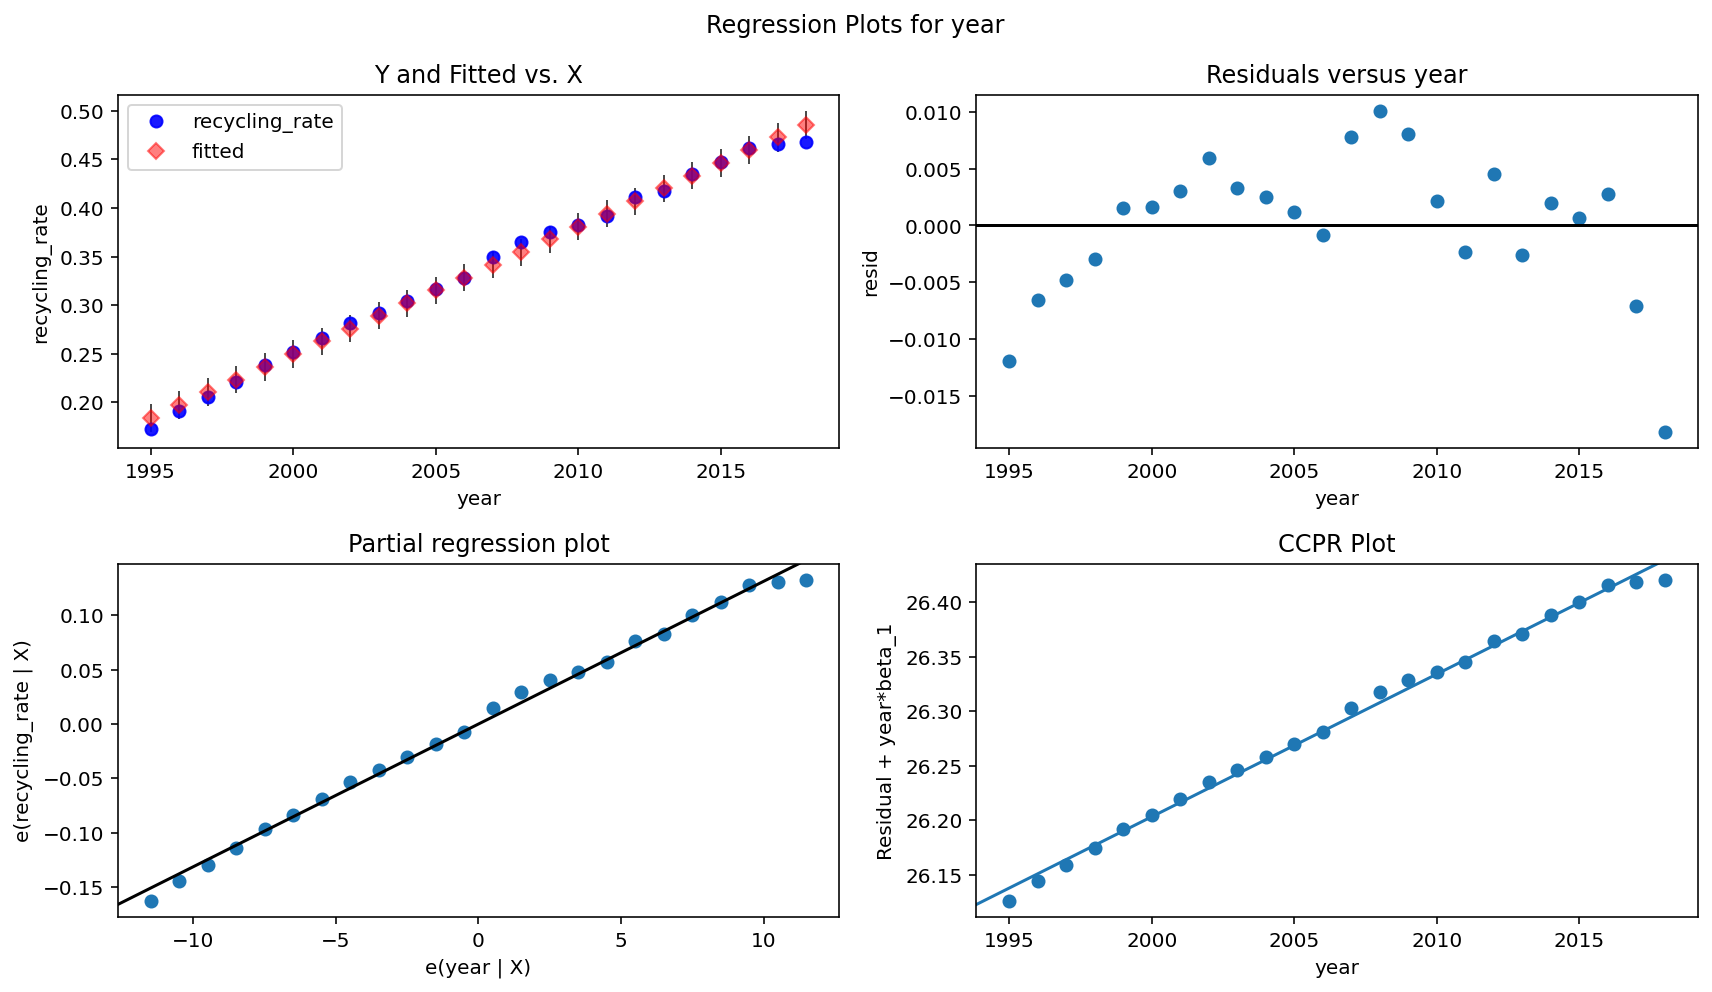

In [17]:
# statsmodels also provides graphics functions. For example, we can draw a plot of partial regression for a set of regressors by:
sm.graphics.plot_regress_exog(res, 'year')
None

In [18]:
res.conf_int()

,0,1
Intercept,-26.755030,-25.151710
year,0.012702,0.013501


Text(0.5, 1.0, 'Wird die EU ihr Ziel, die Recyclingrate bis 2025 auf über 55% zu bringen, erreichen?')

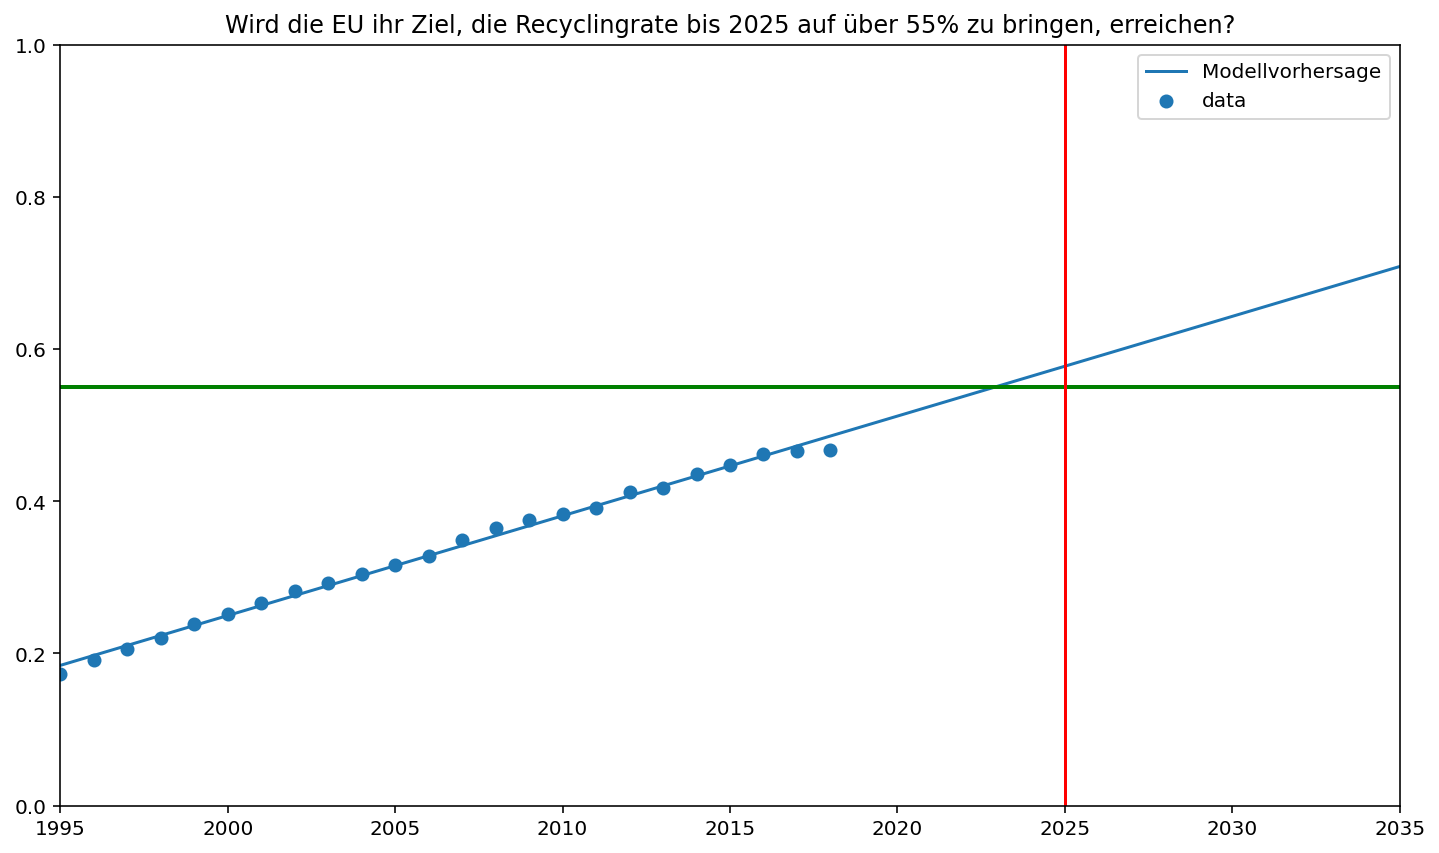

In [19]:
fig = sm.graphics.abline_plot(model_results=res, label="Modellvorhersage")

ax = fig.axes[0]
ax.axhline(0.55, color="green", linewidth=2)
ax.axvline(2025, color="red")
ax.scatter(df_stats.year, df_stats.recycling_rate, label="data")

ax.legend()
ax.margins(.1)
ax.set_xlim(1995, 2035)
ax.set_title("Wird die EU ihr Ziel, die Recyclingrate bis 2025 auf über 55% zu bringen, erreichen?")


Text(0.5, 1.0, 'Wird die EU ihr Ziel, die Recyclingrate bis 2025 auf über 55% zu bringen, erreichen?')

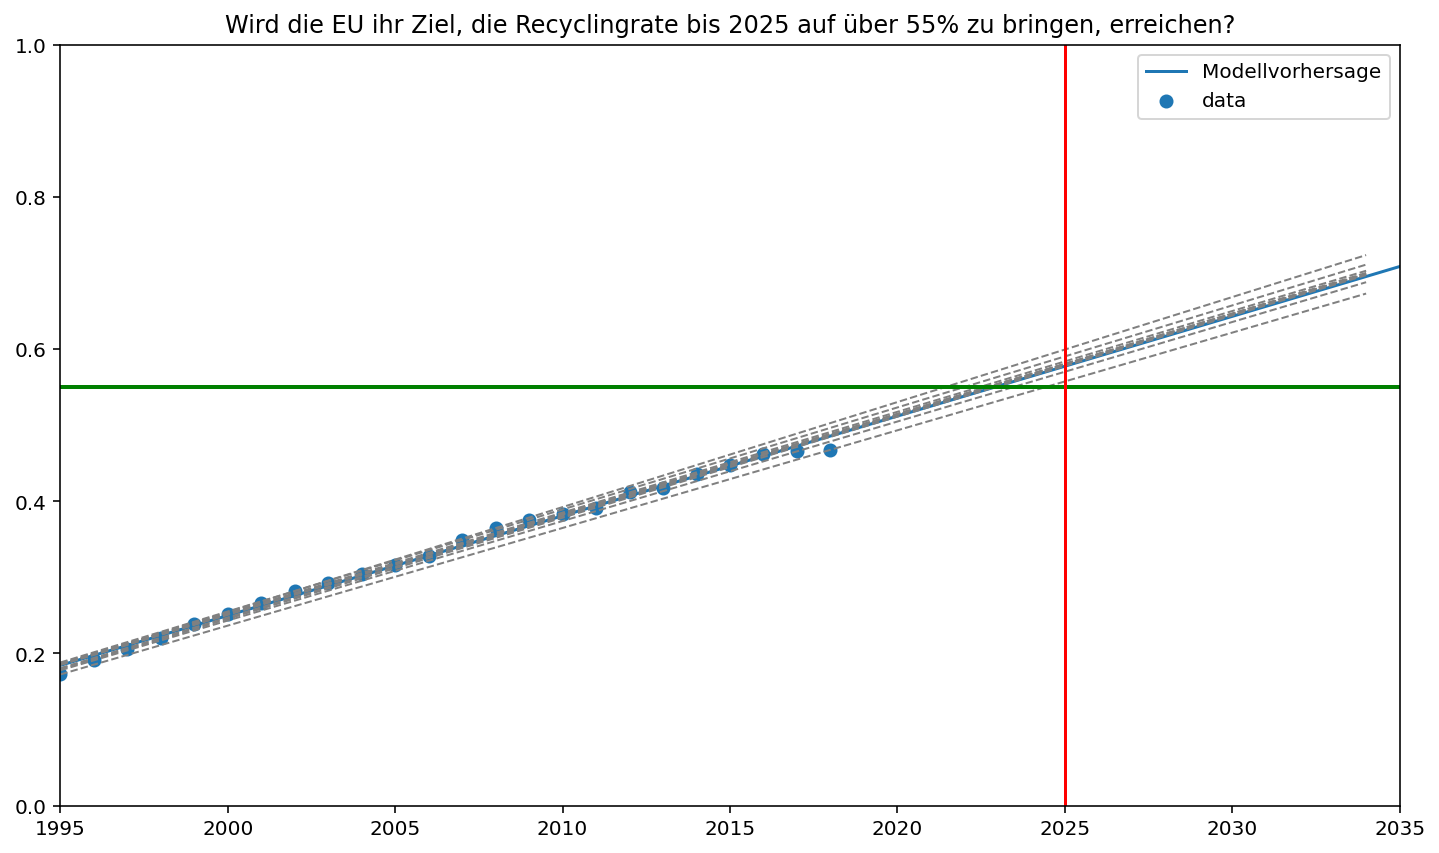

In [27]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
fig = sm.graphics.abline_plot(model_results=res, label="Modellvorhersage")

quantiles = np.arange(.05, .96, .1)
ax = fig.axes[0]
for q in quantiles:
    mod = smf.quantreg('recycling_rate ~ year', df_stats)
    res = mod.fit(q=q)
    #fig = sm.graphics.abline_plot(model_results=res, label="Modellvorhersage")
    X_q = np.array(range(1995, 2035))
    Y_q = res.params["year"] * X_q + res.params["Intercept"]
    ax.plot(X_q, Y_q, color="grey", linestyle="dashed", linewidth=1)

ax = fig.axes[0]
ax.axhline(0.55, color="green", linewidth=2)
ax.axvline(2025, color="red")
ax.scatter(df_stats.year, df_stats.recycling_rate, label="data")

ax.legend()
#ax.margins(.1)
ax.set_xlim(1995, 2035)
ax.set_ylim(0, 1)
ax.set_title("Wird die EU ihr Ziel, die Recyclingrate bis 2025 auf über 55% zu bringen, erreichen?")
